<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB1

In the first lab we'll see three applications of the SVD (Singular Value Decomposition) of a matrix. We usually write  $ \ {A = U \Sigma V^T} $ to express the SVD of a matrix

## SVD for Image Compression

In [5]:
# First we make sure we have all the dependencies we need

!pip install numpy
!pip install matplotlib

First of all we load a 3D image with `np.array`

In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]

image_path = 'images/TarantulaNebula.jpg'

A = imread(image_path)


Now we visualize the picture

(-0.5, 629.5, 566.5, -0.5)

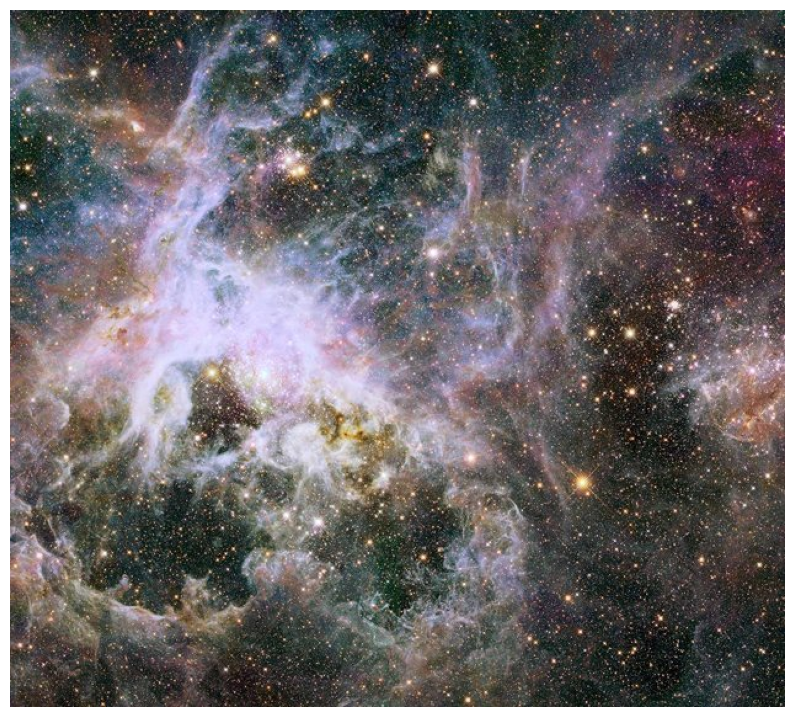

In [7]:
img = plt.imshow(A)
plt.axis('off')

We convert the picture to gray scale and visualize it


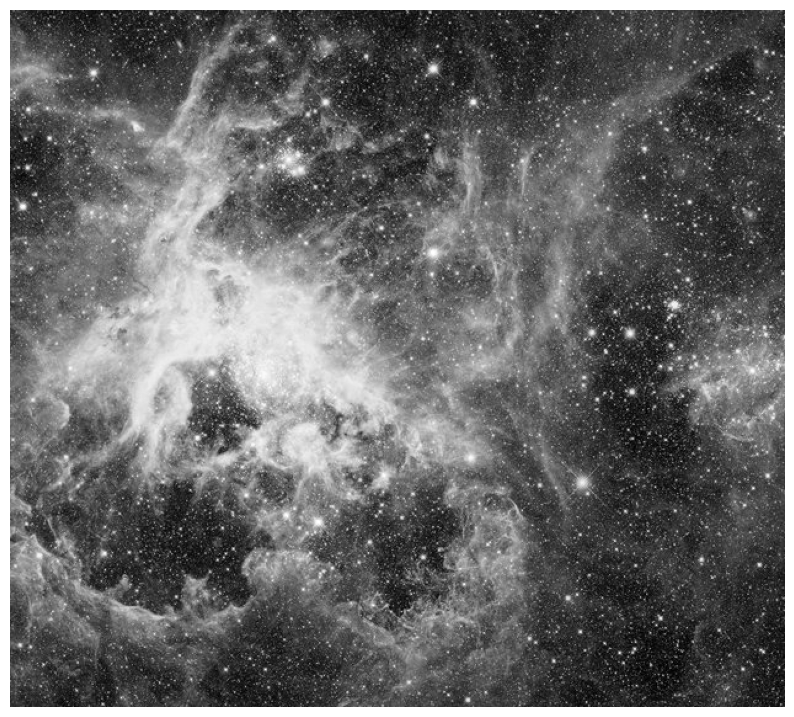

In [14]:
X = np.mean(A, axis=2)
img = plt.imshow(X, cmap="gray") # Why do I have to take the mean on the third (second starting to count from zero) axis
plt.axis('off')
plt.show()

We get the size of the picture by simply calling the method `.shape` on the matrix

In [15]:
X.shape

(567, 630)

Now we perform the SVD. We can choose between the economy SVD and the nomral SVD by passing as argument True or False to the full_matrices parameter

In [19]:
U, s, VT = np.linalg.svd(X, full_matrices=True)
print("Full SVD")
print(f"U shape: {U.shape}")
print(f"s shape: {s.shape}")
print(f"VT shape: {VT.shape}")
U, s, VT = np.linalg.svd(X, full_matrices=False)
print("Economy SVD")
print(f"U shape: {U.shape}")
print(f"s shape: {s.shape}")
print(f"VT shape: {VT.shape}")


Full SVD
U shape: (567, 567)
s shape: (567,)
VT shape: (630, 630)
Economy SVD
U shape: (567, 567)
s shape: (567,)
VT shape: (567, 630)


> Now we plot the trend of the singular values to understand where to cut in order to keep a decent approximation of the matrix.
We will plot:
- the singular values
- the cumulated fraction of the singular values
- the fraction of the "explained variance"

Text(0.5, 1.0, 'Fraction of explained variance')

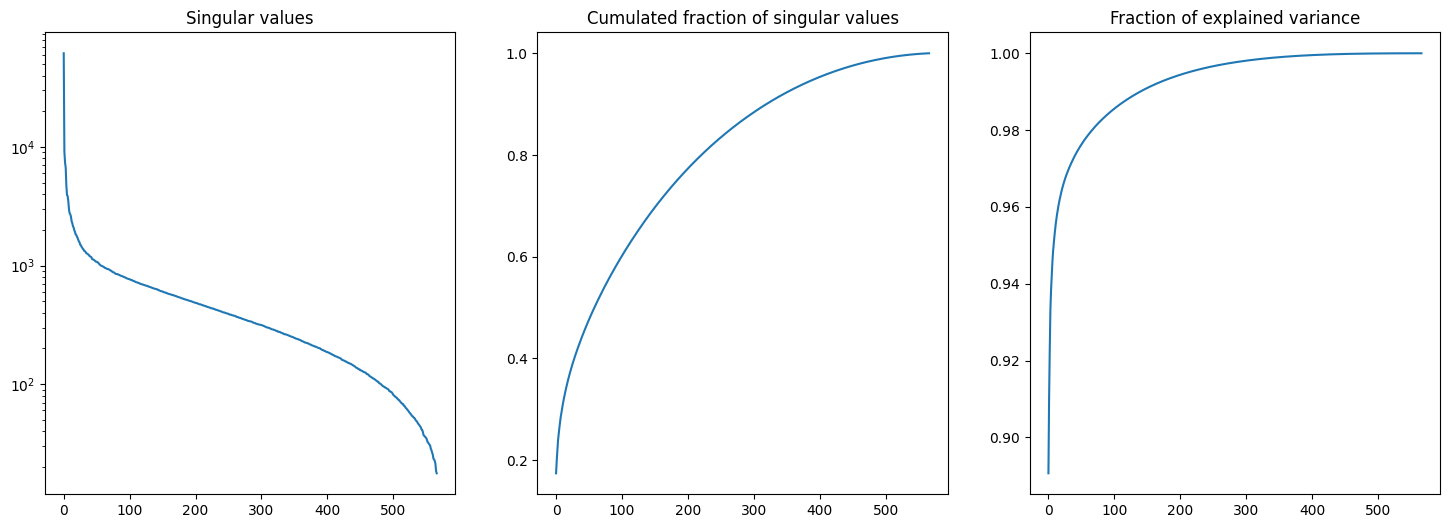

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

axes[0].semilogy(s)
axes[0].set_title("Singular values")

axes[1].plot(np.cumsum(s)/np.sum(s))
axes[1].set_title("Cumulated fraction of singular values")

axes[2].plot(np.cumsum(s**2)/np.sum(s**2))
axes[2].set_title("Fraction of explained variance")

Now we visualize the best rank-k matrices for k = 1, 5, 10, 50, 100, 500.

**REMINDER:** We know that the matrix represents the best k-rank approximating matrix thanks to Eckart-Young theorem

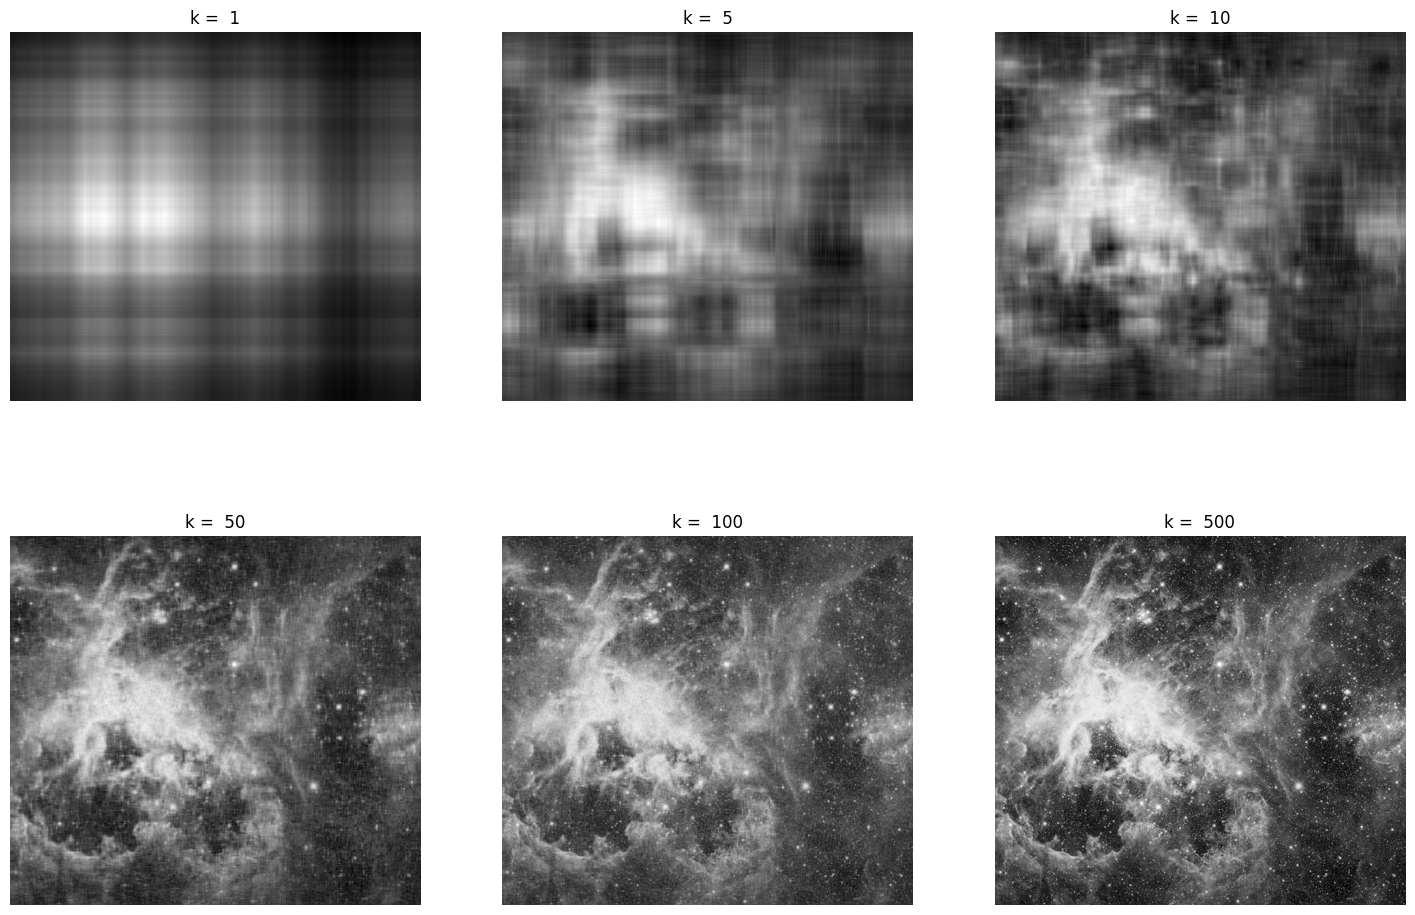

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
axs = axs.reshape((-1,))
indexes = [1, 5, 10, 50, 100, 500]
for i in range(len(indexes)):
  k = indexes[i]
  X_k = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]), VT[:k, :])) # matrix multiplication can be called through np.matmul(A, B) or A @ B natively in python
  axs[i].imshow(X_k, cmap="gray")
  axs[i].set_title(f"k =  {k}")
  axs[i].axis('off')

> The previous image was really complex. We noticed that we have to keep a lot of singular values to have a decent compression of the image.
> What bout a much simpler image?


(-0.5, 719.5, 362.5, -0.5)

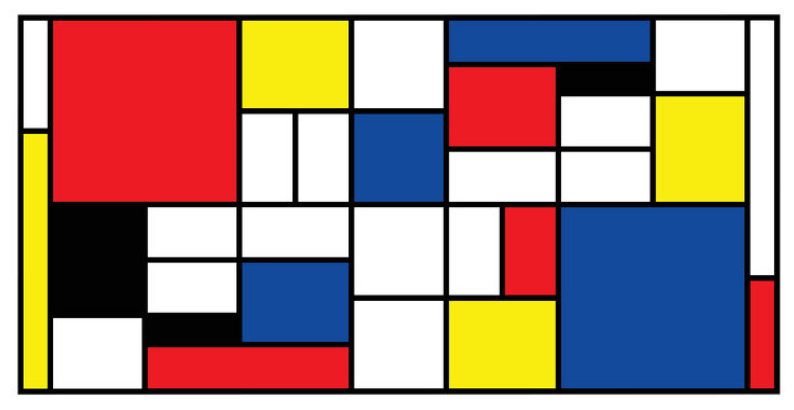

In [29]:
image_path = 'images/mondrian.jpg'
B = imread(image_path)
plt.imshow(img)
plt.axis('off')

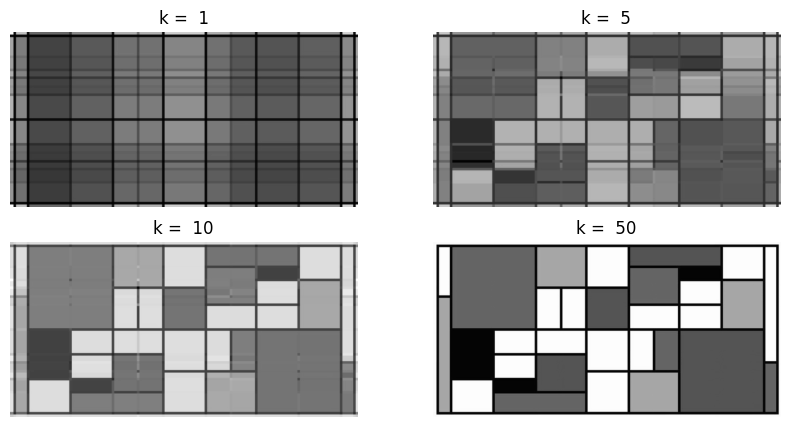

In [36]:
X = np.mean(B, axis=2)
U, s, VT = np.linalg.svd(X, full_matrices=True)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
axs = axs.reshape((-1,))
indexes = [1, 5, 10, 50]
for i in range(len(indexes)):
  k = indexes[i]
  X_k = np.matmul(U[:, :k], np.matmul(np.diag(s[:k]), VT[:k, :]))
  axs[i].imshow(X_k, cmap="gray")
  axs[i].set_title(f"k =  {k}")
  axs[i].axis('off')